<font color="#CA3532"><h1 align="left">**Máster en Big Data y Data Science - Fundamentos de Análisis de Datos**</h1></font>

## **Limpieza de datos básica para práctica 2**

In [0]:
COLAB = True

Primero importamos las bibliotecas que necesitaremos. Además utilizamos la primera celda de código para activar el modo *inline* para los gráficos generados por *matplotlib*. También iniciamos la semilla del generador aleatorio.

In [0]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
startbold = '\033[1m'
endbold = '\033[0m'

# **Problema de tasación de casas en Ames**

Ahora utilizaremos un conjunto de datos que describe la venta de propiedades residenciales individuales en Ames (Iowa, USA) desde 2006 hasta 2010. El conjunto de entrenamiento contiene 1460 observaciones y un gran número de variables explicativas (23 nominales, 23 ordinales, 14 discretas y 20 continuas) involucradas en la evaluación del valor de las viviendas. Para más detalle ver el archivo **data_description.txt**.

In [4]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='10v_NuKdahnzTT7pJKtBF7xrQDgbYfqbT',
                                        dest_path="./Ames.csv")

df = pd.read_csv('./Ames.csv')
df.head(5).T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


# **Limpieza y Análisis Exploratorio de Datos (EDA)**

### **Tipos de datos**

In [5]:
pd.set_option('display.max_rows', 500) # para que al visualizar imprima todas
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### **Visión global de los missing values**

In [6]:
print("Número de casas:", len(df))
print()
print("Variables en las que hay missing values (y número de ellos):")
aux = df.isnull().sum()
aux[aux!=0]

Número de casas: 1460

Variables en las que hay missing values (y número de ellos):


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## **Gestión de cada columna**

La información de cada variable la tomo del fichero **data_description.txt**

### **1. Columna Id**

In [7]:
len(df)

1460

In [8]:
len(np.unique(df["Id"]))

1460

Identificador único de cada casa. La elimino.

In [0]:
del df["Id"]

### **2. Columna MSSubClass**

**Nominal.** Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [10]:
print("Tipo:", df["MSSubClass"].dtypes)

Tipo: int64


In [11]:
print("Número de missing values:", df["MSSubClass"].isnull().sum())
print("Valores únicos:", np.unique(df["MSSubClass"]))

Número de missing values: 0
Valores únicos: [ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]


Como es nominal, la paso a string para que sea procesada por get_dummies que haré al final:

In [12]:
df["MSSubClass"] = df["MSSubClass"].astype(str)
print("Tipo:", df["MSSubClass"].dtypes)

Tipo: object


In [13]:
print("Valores únicos:", np.unique(df["MSSubClass"]))

Valores únicos: ['120' '160' '180' '190' '20' '30' '40' '45' '50' '60' '70' '75' '80' '85'
 '90']


### **3. Columna MSZoning**

**Nominal**. Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [14]:
print("Número de missing values:", df["MSZoning"].isnull().sum())
print("Valores únicos:", np.unique(df["MSZoning"]))

Número de missing values: 0
Valores únicos: ['C (all)' 'FV' 'RH' 'RL' 'RM']


Conclusión variable MSZoning: la dejo como categórica para después aplicar get_dummies sobre ella

### **4. Columna LotFrontage**

**Numérica**. LotFrontage: Linear feet of street connected to property

In [15]:
flags = df["LotFrontage"].isnull()
print("Número de missing en LotFrontage:", sum(flags))
print("Valores únicos no missing:", np.unique(df[~flags]["LotFrontage"]))

Número de missing en LotFrontage: 259
Valores únicos no missing: [ 21.  24.  30.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 114. 115. 116. 118. 120. 121. 122. 124. 128. 129. 130. 134. 137. 138.
 140. 141. 144. 149. 150. 152. 153. 160. 168. 174. 182. 313.]


Conclusión: entiendo que los valores missing son porque la propiedad no da directamente a la calle. Por tanto los sustituyo por 0.

In [0]:
df["LotFrontage"].fillna(0,inplace=True)

### **5. Columna LotArea**

**Numérica.** LotArea: Lot size in square feet

Número de missing values en LotArea: 0
Mínimo y máximo: 1300 y 215245


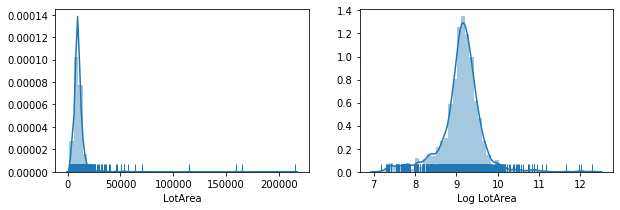

In [17]:
print("Número de missing values en LotArea:", df["LotArea"].isnull().sum())
print("Mínimo y máximo:", df["LotArea"].min(), "y", df["LotArea"].max())
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.distplot(df["LotArea"], rug=True)
plt.subplot(1,2,2)
sns.distplot(np.log(df["LotArea"]), rug=True)
plt.xlabel("Log LotArea");

Conclusión: LotArea parece razonable, su distribución no es simétrica y tiene una cola larga. Convendría quitar outliers (puntos mayor que 100000) o usar Log LotArea. Si esperamos que el valor del inmueble tienda a ser proporcional al de su superficie quizá no deberíamos transformar con el logaritmo.

In [18]:
flags = df["LotArea"]>100000
df["MSZoning"][flags]

249    RL
313    RL
335    RL
706    RL
Name: MSZoning, dtype: object

Opto por quitar esos cuatro outliers:

In [0]:
df = df[~flags]

In [20]:
np.unique(df["LotFrontage"])

array([  0.,  21.,  24.,  30.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 114., 115., 116.,
       118., 120., 121., 122., 124., 128., 129., 130., 134., 137., 138.,
       140., 141., 144., 149., 152., 153., 160., 168., 174., 182., 313.])

### **6. Columna Street**

**Nominal**. Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [21]:
print("Número de missing values:", df["Street"].isnull().sum())
print("Valores únicos:", np.unique(df["Street"], return_counts=True))

Número de missing values: 0
Valores únicos: (array(['Grvl', 'Pave'], dtype=object), array([   5, 1451]))


Conclusión: no hay missing values, y en el fondo es una variable binaria. Pero todos los valores son 'Pave' menos cinco, por lo que no aporta prácticamente información. Por tanto la elimino.

In [0]:
del df["Street"]

### **7. Columna Alley**

**Nominal.** Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [23]:
flags = df["Alley"].isnull()
flags.sum()

1365

In [24]:
np.unique(df["Alley"][~flags])

array(['Grvl', 'Pave'], dtype=object)

Conclusión: recodifico esta variable como 0 si no tiene este tipo de acceso, 1 si este acceso no está pavimentado y 2 si lo está.

In [0]:
df.loc[flags,"Alley"] = 0
df[df["Alley"] == "Grvl"] = 1
df[df["Alley"] == "Pave"] = 2

In [26]:
print(len(df))
np.unique(df["Alley"], return_counts=True)

1456


(array([0, 1, 2]), array([1365,   50,   41]))

### **8. Columna LotShape**

**Ordinal.** General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [27]:
print("Número de missing values:", df["LotShape"].isnull().sum())

Número de missing values: 0


In [28]:
print(list(df["LotShape"])[:100])

['Reg', 'Reg', 'IR1', 'IR1', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'IR2', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 1, 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 2, 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR2', 'Reg', 'IR2', 'IR1', 'Reg', 'IR1', 2, 'IR1', 'IR2', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 1, 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'IR2', 2, 'IR1', 'Reg', 'Reg', 'Reg', 1, 'Reg', 'IR1', 'IR2', 'IR1', 'Reg', 'Reg', 'IR1']


In [29]:
np.unique(df["LotShape"].astype(str), return_counts=True)

(array(['1', '2', 'IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array([ 50,  41, 472,  37,   8, 848]))

Vemos que aparecen los valores 1,2 pero no vienen en las especificaciones. Asumimos que son "IR1", "IR2":

In [0]:
df.loc[df["LotShape"]==1,"LotShape"] = "IR1"
df.loc[df["LotShape"]==2,"LotShape"] = "IR2"

In [31]:
np.unique(df["LotShape"])

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

A continuación realizo mi recodificación:

In [0]:
df["LotShape"] = df["LotShape"].map({"Reg":0,"IR1":1,"IR2":2,"IR3":3})

In [33]:
np.unique(df["LotShape"])

array([0, 1, 2, 3])

### **9. Columna LandContour**

Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

**Considero que tiene sentido un orden y la trato como ordinal.**

In [34]:
df["LandContour"]

0       Lvl
1       Lvl
2       Lvl
3       Lvl
4       Lvl
       ... 
1455    Lvl
1456    Lvl
1457    Lvl
1458    Lvl
1459    Lvl
Name: LandContour, Length: 1456, dtype: object

Vemos que pasa parecido con la anterior (hay valores no especificados: 1,2)

In [35]:
np.unique(df["LandContour"].astype(str), return_counts=True)

(array(['1', '2', 'Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array([  50,   41,   51,   46,   33, 1235]))

In [36]:
print((df["LandContour"]==1).sum())
print((df["LandContour"]==2).sum())

50
41


Conclusión: no está claro cómo hacer corresponder los valores que no están en la especificación (1 y 2) con los que sí están. Elimino esos casos con valores 1 y 2:

In [0]:
df = df[(df["LandContour"]!=1) & (df["LandContour"]!=2)]

In [38]:
np.unique(df["LandContour"], return_counts=True)

(array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array([  51,   46,   33, 1235]))

Ahora recodifico como entero:

In [0]:
df["LandContour"] = df["LandContour"].map({"Low":0,"HLS":1,"Bnk":2,"Lvl":3})

Pero al haber eliminado algunas casas ahora la columna Alley es constante:

In [40]:
print(len(df))
np.unique(df["Alley"], return_counts=True)

1365


(array([0]), array([1365]))

Por lo que la elimino:

In [0]:
del df["Alley"]

### **10. Columna Utilities**

**Ordinal.** Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [42]:
print("Número de missing values:", df["Utilities"].isnull().sum())
print("Valores únicos:", np.unique(df["Utilities"].astype(str), return_counts=True))

Número de missing values: 0
Valores únicos: (array(['AllPub', 'NoSeWa'], dtype=object), array([1364,    1]))


Vemos que todos los valores son 'AllPub' menos uno que es 'NoSeWa'. Conclusión: esta variable no aporta casi información, la eliminamos.

In [0]:
del df["Utilities"]

### **11. Columna LotConfig**

Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

**La voy a tratar como ordinal.**

In [44]:
print("Número de missings:", df["LotConfig"].isnull().sum())
print("Valores únicos:", np.unique(df["LotConfig"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object), array([247,  92,  47,   4, 975]))


Ahora la recodifico como entero

In [0]:
df["LotConfig"] = df["LotConfig"].map({"Inside":0,"Corner":1,"CulDSac":2,
                                       "FR2":3,"FR3":4})

### **12. Columna LandSlope**

**Ordinal.** Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [46]:
print("Número de missing values:", df["LandSlope"].isnull().sum())
print("Valores únicos:", np.unique(df["LandSlope"],return_counts=True))

Número de missing values: 0
Valores únicos: (array(['Gtl', 'Mod', 'Sev'], dtype=object), array([1294,   62,    9]))


Conclusión: la recodifico como 0, 1 o 2

In [0]:
df["LandSlope"] = df["LandSlope"].map({"Gtl":0,"Mod":1,"Sev":2})

### **13. Columna Neighborhood**

**Nominal.** Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [48]:
print("Número de missings:", df["Neighborhood"].isnull().sum())
print("Valores únicos:", np.unique(df["Neighborhood"]))

Número de missings: 0
Valores únicos: ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']


Conclusión: la dejo como está (luego se hará un get_dummies sobre ella)

### **14. Columnas Condition1 y Condition2**

**Columna Condition1:**

**Nominal.** Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

**Columna Condition2:**

**Nominal.** Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [49]:
print("Número de missing values en Condition1:", df["Condition1"].isnull().sum())
print("Valores únicos:", np.unique(df["Condition1"], return_counts=True))

Número de missing values en Condition1: 0
Valores únicos: (array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'], dtype=object), array([  37,   78, 1180,    8,   18,   11,   26,    2,    5]))


In [50]:
print("Número de missing values en Condition2:", df["Condition2"].isnull().sum())
print("Valores únicos:", np.unique(df["Condition2"], return_counts=True))

Número de missing values en Condition2: 0
Valores únicos: (array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
      dtype=object), array([   2,    6, 1350,    1,    2,    1,    1,    2]))


In [51]:
df[["Condition1","Condition2"]][:10]

,Condition1,Condition2
0,Norm,Norm
1,Feedr,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm
5,Norm,Norm
6,Norm,Norm
7,PosN,Norm
8,Artery,Norm
9,Artery,Artery


In [52]:
cond = pd.get_dummies(df["Condition1"])
cond[:3]

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0


In [53]:
cond2 = pd.get_dummies(df["Condition2"])
cond2[:3]

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0


In [54]:
cond[cond2.columns] = cond[cond2.columns] + cond2
cond.clip_upper(1,inplace=True)
cond.rename(columns={x:"Condition_"+x for x in cond.columns}, inplace=True)
cond[:3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  


,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0


In [55]:
sum(df.index != cond.index)

0

In [56]:
df = df.join(cond)
df[:3]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn
0,60,RL,65.0,8450,0,3,0,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0,0,1,0,0,0,0,0,0
1,20,RL,80.0,9600,0,3,3,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0,1,1,0,0,0,0,0,0
2,60,RL,68.0,11250,1,3,0,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0,0,1,0,0,0,0,0,0


Nos quedamos con las variables dummies creadas por lo que eliminamos las originales:

In [0]:
del df["Condition1"]
del df["Condition2"]

### **15. Columna BldgType**

**Nominal.** Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [58]:
print("Número de missing values:", df["BldgType"].isnull().sum())
print("Valores únicos:", np.unique(df["BldgType"], return_counts=True))

Número de missing values: 0
Valores únicos: (array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object), array([1154,   23,   50,   38,  100]))


Conclusión: la dejo como está (para hacer posteriormente get_dummies sobre ella)

### **16. Columna HouseStyle**

**Nominal.** Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [59]:
print("Número de missings:", df["HouseStyle"].isnull().sum())
print("Valores únicos:", np.unique(df["HouseStyle"]))

Número de missings: 0
Valores únicos: ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']


Conclusión: la dejo como está (para luego hacer get_dummies)

### **17. Columnas OverallQual y OverallCond**

**Numéricas.**

**OverallQual:** Rates the overall material and finish of the house

**OverallCond:** Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [60]:
print("Número de missings en OverallQual:", df["OverallQual"].isnull().sum())
print("Valores únicos:", np.unique(df["OverallQual"]))

Número de missings en OverallQual: 0
Valores únicos: [ 1  2  3  4  5  6  7  8  9 10]


In [61]:
print("Número de missings en OverallCond:", df["OverallCond"].isnull().sum())
print("Valores únicos:", np.unique(df["OverallCond"]))

Número de missings en OverallCond: 0
Valores únicos: [1 2 3 4 5 6 7 8 9]


Conclusión: las dejo como están

### **18. Columnas YearBuilt y YearRemodAdd**

**Numéricas.**

**YearBuilt:** Original construction date

**YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)

In [62]:
print("Número de missings en YearBuilt:", df["YearBuilt"].isnull().sum())
print("Valores únicos:", np.unique(df["YearBuilt"]))

Número de missings en YearBuilt: 0
Valores únicos: [1875 1880 1885 1890 1892 1893 1898 1900 1908 1910 1911 1912 1913 1914
 1915 1916 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1934 1935 1936 1937 1938 1939 1940 1941 1942 1945 1946
 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010]


In [63]:
print("Número de missings en YearRemodAdd:", df["YearRemodAdd"].isnull().sum())
print("Valores únicos:", np.unique(df["YearRemodAdd"]))

Número de missings en YearRemodAdd: 0
Valores únicos: [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]


Conclusión: las dejo como están

### **19. Columna RoofStyle**

**Nominal.** Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [64]:
print("Número de missings:", df["RoofStyle"].isnull().sum())
print("Valores únicos:", np.unique(df["RoofStyle"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], dtype=object), array([  13, 1058,    7,  280,    5,    2]))


Conclusión: hay muy pocas casas cuyos valores no sean 'Gable' o 'Hip' (13+7+5+2=27 en total). Solución: o separo solo en dos categorías (Gable / no Gable) o en tres (Gable / Hip / Other). Opto por esto último:

In [0]:
for x in ["Flat","Gambrel","Mansard","Shed"]:
    df.loc[df["RoofStyle"]==x, "RoofStyle"] = "Other"

In [66]:
print("Número de missings:", df["RoofStyle"].isnull().sum())
print("Valores únicos:", np.unique(df["RoofStyle"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['Gable', 'Hip', 'Other'], dtype=object), array([1058,  280,   27]))


En caso de que la tercera categoría no sea informativa, esa variable será eliminada en el proceso de selección de variables.

### **20. Columna RoofMatl**

**Nominal.** Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [67]:
print("Número de missings:", df["RoofMatl"].isnull().sum())
print("Valores únicos:", np.unique(df["RoofMatl"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv',
       'WdShake', 'WdShngl'], dtype=object), array([   1, 1339,    1,    1,    1,   11,    5,    6]))


Conclusión: en vista a las estadísticas, considero sólo dos clases: CompShg / No CompShg

In [0]:
df["RoofMatl"] = 1*(df["RoofMatl"]=='CompShg')

# La renombro:
df.rename(columns={"RoofMatl":"RoofMatl_CompShg"}, inplace=True)

In [69]:
print("Número de missings de RoofMatl_CompShg:", df["RoofMatl_CompShg"].isnull().sum())
print("Valores únicos:", np.unique(df["RoofMatl_CompShg"], return_counts=True))

Número de missings de RoofMatl_CompShg: 0
Valores únicos: (array([0, 1]), array([  26, 1339]))


### **21. Columnas Exterior1st y Exterior2nd**

**Las dos columnas son nominales.**

**Variable Exterior1st:**

Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

**Variable Exterior2nd:**

Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [70]:
print("Número de missing values en Exterior1st:", df["Exterior1st"].isnull().sum())
print("Valores únicos:", np.unique(df["Exterior1st"]))

Número de missing values en Exterior1st: 0
Valores únicos: ['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'WdShing']


In [71]:
print("Número de missing values en Exterior2nd:", df["Exterior2nd"].isnull().sum())
print("Valores únicos:", np.unique(df["Exterior2nd"]))

Número de missing values en Exterior2nd: 0
Valores únicos: ['AsbShng' 'AsphShn' 'Brk Cmn' 'BrkFace' 'CBlock' 'CmentBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Other' 'Plywood' 'Stone' 'Stucco' 'VinylSd'
 'Wd Sdng' 'Wd Shng']


Hay algunos valores que no son como en las especificaciones:
* **Exterior2nd:** Brk Cmn -> BrkComm
* **Exterior2nd:** CmentBd -> CemntBd
* **Exterior2nd:** Wd Shng -> WdShing

In [72]:
df.loc[df["Exterior2nd"]=="Brk Cmn","Exterior2nd"] = "BrkComm"
df.loc[df["Exterior2nd"]=="CmentBd","Exterior2nd"] = "CemntBd"
df.loc[df["Exterior2nd"]=="Wd Shng","Exterior2nd"] = "WdShing"
print("Valores únicos de Exterior2nd:", np.unique(df["Exterior2nd"]))

Valores únicos de Exterior2nd: ['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Other' 'Plywood' 'Stone' 'Stucco' 'VinylSd'
 'Wd Sdng' 'WdShing']


In [73]:
df[["Exterior1st","Exterior2nd"]][:10]

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,WdShing
4,VinylSd,VinylSd
5,VinylSd,VinylSd
6,VinylSd,VinylSd
7,HdBoard,HdBoard
8,BrkFace,WdShing
9,MetalSd,MetalSd


In [74]:
exterior = pd.get_dummies(df["Exterior1st"])
exterior["Other"] = 0 # este valor lo tiene Exterior2nd pero no Exterior1st
exterior[:3]

,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Other
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [75]:
exterior2 = pd.get_dummies(df["Exterior2nd"])
exterior2[:3]

,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [76]:
exterior[exterior2.columns] = exterior[exterior2.columns] + exterior2
exterior.clip_upper(1,inplace=True)
exterior.rename(columns={x:"Exterior_"+x for x in exterior.columns}, inplace=True)
exterior[:3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  


,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Exterior_Other
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [77]:
sum(df.index != exterior.index)

0

In [78]:
df = df.join(exterior)
df[:3]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl_CompShg,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Exterior_Other
0,60,RL,65.0,8450,0,3,0,0,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,1,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,20,RL,80.0,9600,0,3,3,0,Veenker,1Fam,1Story,6,8,1976,1976,Gable,1,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,1,3,0,0,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,1,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
del df["Exterior1st"]
del df["Exterior2nd"]

### **22. Columna MasVnrType**

**Nominal.** Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [80]:
print("Número de missings:", df["MasVnrType"].isnull().sum())

Número de missings: 7


Conclusión: quito esas pocas casas donde hay missing

In [81]:
len(df)

1365

In [0]:
df.dropna(subset=["MasVnrType"],axis=0,inplace=True)

In [83]:
len(df)

1358

In [84]:
print("Valores únicos:", np.unique(df["MasVnrType"], return_counts=True))

Valores únicos: (array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object), array([ 14, 435, 785, 124]))


### **23. Columna MasVnrArea**

**Numérica.** Masonry veneer area in square feet

In [85]:
print("Número de missings:", df["MasVnrArea"].isnull().sum())
print("Valores únicos:", np.unique(df["MasVnrArea"]))

Número de missings: 0
Valores únicos: [0.000e+00 1.000e+00 1.100e+01 1.400e+01 1.600e+01 1.800e+01 2.200e+01
 2.400e+01 2.700e+01 2.800e+01 3.000e+01 3.100e+01 3.200e+01 3.400e+01
 3.600e+01 3.800e+01 4.000e+01 4.100e+01 4.200e+01 4.400e+01 4.500e+01
 4.600e+01 4.800e+01 5.000e+01 5.100e+01 5.300e+01 5.400e+01 5.600e+01
 5.700e+01 6.000e+01 6.300e+01 6.400e+01 6.500e+01 6.600e+01 6.700e+01
 6.800e+01 7.000e+01 7.200e+01 7.400e+01 7.500e+01 7.600e+01 8.000e+01
 8.100e+01 8.200e+01 8.400e+01 8.500e+01 8.600e+01 8.800e+01 8.900e+01
 9.000e+01 9.200e+01 9.400e+01 9.500e+01 9.600e+01 9.700e+01 9.800e+01
 9.900e+01 1.000e+02 1.010e+02 1.020e+02 1.040e+02 1.050e+02 1.060e+02
 1.080e+02 1.090e+02 1.100e+02 1.120e+02 1.130e+02 1.140e+02 1.150e+02
 1.160e+02 1.170e+02 1.190e+02 1.200e+02 1.220e+02 1.230e+02 1.250e+02
 1.260e+02 1.270e+02 1.280e+02 1.300e+02 1.320e+02 1.350e+02 1.360e+02
 1.370e+02 1.380e+02 1.400e+02 1.420e+02 1.430e+02 1.440e+02 1.450e+02
 1.460e+02 1.470e+02 1.480e+02 1.490e+0

Conclusión: la dejo como está

### **24. Columnas ExterQual y ExterCond**

**Ordinales.**

**ExterQual:** Evaluates the quality of the material on the exterior 

**ExterCond:** Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [86]:
print("Número de missings en ExterQual:", df["ExterQual"].isnull().sum())
print("Valores únicos:", np.unique(df["ExterQual"], return_counts=True))

Número de missings en ExterQual: 0
Valores únicos: (array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object), array([ 51,  12, 457, 838]))


Conclusión: la recodifico como entera. Nivel más bajo: 1 (Poor). Nivel más alto: 5 (Excellent)

In [0]:
df["ExterQual"] = df["ExterQual"].map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [88]:
# La otra variable: ExterCond
print("Número de missings en ExterCond:", df["ExterCond"].isnull().sum())
print("Valores únicos:", np.unique(df["ExterCond"], return_counts=True))

Número de missings en ExterCond: 0
Valores únicos: (array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object), array([   3,   23,  135,    1, 1196]))


Hago lo mismo que en la anterior:

In [0]:
df["ExterCond"] = df["ExterCond"].map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

### **25. Columna Foundation**

**Nominal.** Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [90]:
print("Número de missings:", df["Foundation"].isnull().sum())
print("Valores únicos:", np.unique(df["Foundation"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object), array([111, 611, 606,  24,   3,   3]))


Conclusión: agrupo las categorías menos frecuentes (Slab, Stone, Wood) en 'Other'

In [0]:
for x in ["Slab","Stone","Wood"]:
    df.loc[df["Foundation"]==x, "Foundation"] = "Other"

In [92]:
print("Número de missings:", df["Foundation"].isnull().sum())
print("Valores únicos:", np.unique(df["Foundation"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['BrkTil', 'CBlock', 'Other', 'PConc'], dtype=object), array([111, 611,  30, 606]))


### **26. Columnas Basement**

**TotalBsmtSF:** Total square feet of basement area. Numérica.

In [93]:
print("Número de missings:", df["TotalBsmtSF"].isnull().sum())
print("Número de valores=0:", (df["TotalBsmtSF"]==0).sum())

Número de missings: 0
Número de valores=0: 36


Dejo esta variable como está. Interpreto además que si la superficie del sótano es 0 es que no hay sótano.

**BsmtQual:** Evaluates the height of the basement. Ordinal.

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [94]:
print("Número de missings:", df["BsmtQual"].isnull().sum())

Número de missings: 36


Sale el mismo número de casos que ceros en superficie del sótano. Chequeo si efectivamente son los mismos casos:

In [95]:
print(sum((df["TotalBsmtSF"]==0) & df["BsmtQual"].isnull()))

36


Sí, son los mismos casos. Por tanto sustituyo esos missings por "NA"

In [96]:
df["BsmtQual"].fillna("NA",inplace=True)
print("Valores únicos:", np.unique(df["BsmtQual"]))

Valores únicos: ['Ex' 'Fa' 'Gd' 'NA' 'TA']


Finalmente las recodifico con un entero:

In [0]:
df["BsmtQual"] = df["BsmtQual"].map({"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

**Variable BsmtCond:** Evaluates the general condition of the basement. Ordinal.

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [98]:
print("Número de missings:", df["BsmtCond"].isnull().sum())
print("De ellos, TotalBsmtSF=0 en",
      sum((df["TotalBsmtSF"]==0) & df["BsmtCond"].isnull()), "casos")

Número de missings: 36
De ellos, TotalBsmtSF=0 en 36 casos


Pasa lo mismo que en el anterior caso, por lo que hago lo mismo:

In [99]:
df["BsmtCond"].fillna("NA",inplace=True)
print("Valores únicos:", np.unique(df["BsmtCond"]))
df["BsmtCond"] = df["BsmtCond"].map({"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

Valores únicos: ['Fa' 'Gd' 'NA' 'Po' 'TA']


**Variable BsmtExposure:** Refers to walkout or garden level walls. Ordinal.

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [100]:
print("Número de missings en BsmtExposure:", df["BsmtExposure"].isnull().sum())
print("De ellos, TotalBsmtSF=0 en",
      sum((df["TotalBsmtSF"]==0) & df["BsmtExposure"].isnull()), "casos")

Número de missings en BsmtExposure: 37
De ellos, TotalBsmtSF=0 en 36 casos


Hay un caso más de los 36 que se esperaban. Primero relleno con "NA" los casos donde TotalBsmtSF es 0:

In [101]:
df.loc[df["TotalBsmtSF"]==0,"BsmtExposure"] = "NA"
print("Número de missings en BsmtExposure:", df["BsmtExposure"].isnull().sum())

Número de missings en BsmtExposure: 1


Y el caso restante lo elimino:

In [0]:
df.dropna(subset=["BsmtExposure"], axis=0, inplace=True)

In [103]:
print("Valores únicos:", np.unique(df["BsmtExposure"]))

Valores únicos: ['Av' 'Gd' 'Mn' 'NA' 'No']


Ahora hago lo mismo que con **BsmtCond:**

In [0]:
df["BsmtExposure"] = df["BsmtExposure"].map({"NA":0,"No":1,"Mn":2,"Av":3,"Gd":4})

**Variable BsmtFinType1:** Rating of basement finished area. Ordinal.

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [105]:
print("Número de missings:", df["BsmtFinType1"].isnull().sum())
print("De ellos, TotalBsmtSF=0 en",
      sum((df["TotalBsmtSF"]==0) & df["BsmtFinType1"].isnull()), "casos")

Número de missings: 36
De ellos, TotalBsmtSF=0 en 36 casos


Pasa lo mismo que anteriormente, por lo que hago algo similar:

In [106]:
df["BsmtFinType1"].fillna("NA",inplace=True)
print("Valores únicos:", np.unique(df["BsmtFinType1"]))
df["BsmtFinType1"] = df["BsmtFinType1"].map({"NA":0,"Unf":1,"LwQ":2,"Rec":3,
                                             "BLQ":4,"ALQ":5,"GLQ":6})

Valores únicos: ['ALQ' 'BLQ' 'GLQ' 'LwQ' 'NA' 'Rec' 'Unf']


**Variable BsmtFinSF1:** Type 1 finished square feet. Numérica.

In [107]:
print("Número de missings:", df["BsmtFinSF1"].isnull().sum())
df[["BsmtFinSF1"]].describe().T

Número de missings: 0


,count,mean,std,min,25%,50%,75%,max
BsmtFinSF1,1357.0,458.114223,459.262514,0.0,0.0,403.0,732.0,5644.0


Conclusión: la dejo como está

**Variable BsmtFinType2:**

Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [108]:
print("Número de missings:", df["BsmtFinType2"].isnull().sum())
print("De ellos, TotalBsmtSF=0 en",
      sum((df["TotalBsmtSF"]==0) & df["BsmtFinType2"].isnull()), "casos")

Número de missings: 37
De ellos, TotalBsmtSF=0 en 36 casos


Hay un caso más de los 36 que se esperaban. Primero relleno con "NA" los casos donde TotalBsmtSF es 0:

In [109]:
df.loc[df["TotalBsmtSF"]==0,"BsmtFinType2"] = "NA"
print("Número de missings en BsmtFinType2:", df["BsmtFinType2"].isnull().sum())

Número de missings en BsmtFinType2: 1


Y el caso restante lo elimino:

In [0]:
df.dropna(subset=["BsmtFinType2"], axis=0, inplace=True)

In [111]:
print("Valores únicos:", np.unique(df["BsmtFinType2"]))

Valores únicos: ['ALQ' 'BLQ' 'GLQ' 'LwQ' 'NA' 'Rec' 'Unf']


Ahora recodifico como entero:

In [0]:
df["BsmtFinType2"] = df["BsmtFinType2"].map({"NA":0,"Unf":1,"LwQ":2,"Rec":3,
                                             "BLQ":4,"ALQ":5,"GLQ":6})

**Variable BsmtFinSF2:** Type 2 finished square feet. Numérica.

In [113]:
print("Número de missings:", df["BsmtFinSF2"].isnull().sum())
df[["BsmtFinSF2"]].describe().T

Número de missings: 0


,count,mean,std,min,25%,50%,75%,max
BsmtFinSF2,1356.0,48.05236,164.014614,0.0,0.0,0.0,0.0,1474.0


Conclusión: la dejo como está

**Variable BsmtUnfSF:** Unfinished square feet of basement area. Numérica.

In [114]:
print("Número de missings:", df["BsmtUnfSF"].isnull().sum())
df[["BsmtUnfSF"]].describe().T

Número de missings: 0


,count,mean,std,min,25%,50%,75%,max
BsmtUnfSF,1356.0,562.258112,448.910497,0.0,211.5,460.0,808.5,2336.0


Conclusión: la dejo como está

### **27. Columna Heating**

**Nominal.** Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [115]:
print("Número de missings:", df["Heating"].isnull().sum())
print("Valores únicos:", np.unique(df["Heating"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['Floor', 'GasA', 'GasW', 'Grav', 'Wall'], dtype=object), array([   1, 1333,   12,    6,    4]))


Conclusión: en vista a las estadísticas, considero sólo dos clases: GasA / No GasA

In [0]:
df["Heating"] = 1*(df["Heating"]=='GasA')

# La renombro:
df.rename(columns={"Heating":"Heating_GasA"}, inplace=True)

In [117]:
print("Número de missings de Heating_GasA:", df["Heating_GasA"].isnull().sum())
print("Valores únicos:", np.unique(df["Heating_GasA"], return_counts=True))

Número de missings de Heating_GasA: 0
Valores únicos: (array([0, 1]), array([  23, 1333]))


### **28. Columna HeatingQC**

**Ordinal.** Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [118]:
print("Número de missings:", df["HeatingQC"].isnull().sum())
print("Valores únicos:", np.unique(df["HeatingQC"]))

Número de missings: 0
Valores únicos: ['Ex' 'Fa' 'Gd' 'Po' 'TA']


Conclusión: Recodifico con entero

In [0]:
df["HeatingQC"] = df["HeatingQC"].map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

### **29. Columna CentralAir**

**Nominal.** Central air conditioning

       N	No
       Y	Yes

In [120]:
print("Número de missings:", df["CentralAir"].isnull().sum())
print("Valores únicos:", np.unique(df["CentralAir"]))

Número de missings: 0
Valores únicos: ['N' 'Y']


Conclusión: Recodifico con entero

In [0]:
df["CentralAir"] = df["CentralAir"].map({"N":0,"Y":1})

### **30. Columna Electrical**

**La interpreto como ordinal (de mejor a peor).** Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [122]:
print("Número de missings:", df["Electrical"].isnull().sum())

Número de missings: 1


Quito la casa en la que hay ese missing:

In [0]:
df.dropna(subset=["Electrical"],axis=0,inplace=True)

In [124]:
print("Número de missings:", df["Electrical"].isnull().sum())
print("Valores únicos:", np.unique(df["Electrical"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype=object), array([  82,   23,    1,    1, 1248]))


Conclusión: Recodifico con entero

In [0]:
df["Electrical"] = df["Electrical"].map({"Mix":1,"FuseP":2,"FuseF":3,"FuseA":4,"SBrkr":5})

### **31. Columnas Variable 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd**

**Todas son variables numéricas.**

**1stFlrSF:** First Floor square feet

**2ndFlrSF:** Second floor square feet

**LowQualFinSF:** Low quality finished square feet (all floors)

**GrLivArea:** Above grade (ground) living area square feet

**BsmtFullBath:** Basement full bathrooms

**BsmtHalfBath:** Basement half bathrooms

**FullBath:** Full bathrooms above grade

**HalfBath:** Half baths above grade

**BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)

**KitchenAbvGr:** Kitchens above grade

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

In [0]:
variables = ["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
             "BsmtFullBath","BsmtHalfBath","FullBath",
             "HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd"]

In [127]:
print("Número de missings:\n")
print(df[variables].isnull().sum())

Número de missings:

1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
dtype: int64


In [128]:
df[variables].describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1355.0,1173.879705,386.803657,334.0,892.5,1097.0,1413.0,4692.0
2ndFlrSF,1355.0,334.848708,438.993940,0.0,0.0,0.0,728.0,2065.0
LowQualFinSF,1355.0,5.323247,47.108398,0.0,0.0,0.0,0.0,572.0
GrLivArea,1355.0,1514.051661,530.549200,334.0,1120.0,1466.0,1777.5,5642.0
BsmtFullBath,1355.0,0.436162,0.519365,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,1355.0,0.059041,0.241971,0.0,0.0,0.0,0.0,2.0
FullBath,1355.0,1.565314,0.553604,0.0,1.0,2.0,2.0,3.0
HalfBath,1355.0,0.385978,0.504875,0.0,0.0,0.0,1.0,2.0
BedroomAbvGr,1355.0,2.861993,0.796592,0.0,2.0,3.0,3.0,6.0
KitchenAbvGr,1355.0,1.044280,0.216292,0.0,1.0,1.0,1.0,3.0


Conclusión: las dejo como están

### **32. Columna KitchenQual**

**Ordinal.** Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [129]:
print("Número de missings:", df["KitchenQual"].isnull().sum())
print("Valores únicos antes de pasar a entero:", np.unique(df["KitchenQual"],
                                                           return_counts=True))

Número de missings: 0
Valores únicos antes de pasar a entero: (array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object), array([ 96,  33, 542, 684]))


Ahora mapeo estos valores a enteros:

In [0]:
df["KitchenQual"] = df["KitchenQual"].map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

### **33. Columna Functional**

**Ordinal.** Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [131]:
print("Número de missings:", df["Functional"].isnull().sum())
print("Valores únicos antes de pasar a entero:", np.unique(df["Functional"],
                                                           return_counts=True))

Número de missings: 0
Valores únicos antes de pasar a entero: (array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'], dtype=object), array([  13,    5,   30,   27,   14,    1, 1265]))


Ahora mapeo estos valores a enteros:

In [0]:
df["Functional"] = df["Functional"].map({"Sal":1,"Sev":2,"Maj2":3,"Maj1":4,
                                         "Mod":5,"Min2":6,"Min1":7,"Typ":8})

### **34. Columnas Fireplaces**

**Fireplaces:** Number of fireplaces. **Numérica.**

**FireplaceQu:** Fireplace quality. **Ordinal.**

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [133]:
vars_fi = ["Fireplaces","FireplaceQu"]
df[vars_fi].isnull().sum()

Fireplaces       0
FireplaceQu    622
dtype: int64

In [134]:
(df[vars_fi]==0).sum()

Fireplaces     622
FireplaceQu      0
dtype: int64

¿Coinciden los ceros de Fireplaces con los missings de FireplaceQu?

In [135]:
sum((df["Fireplaces"] == 0) &
    df["FireplaceQu"].isnull())

622

Respuesta: sí

In [136]:
df[["Fireplaces"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Fireplaces,1355.0,0.627306,0.643562,0.0,0.0,1.0,1.0,3.0


Conclusión: dejo "Fireplaces" como está

Ahora imputo el string "NA" a los missing de "FireplaceQu":

In [137]:
df["FireplaceQu"].fillna("NA",inplace=True)
print("Valores únicos antes de pasar a entero:", np.unique(df["FireplaceQu"]))

Valores únicos antes de pasar a entero: ['Ex' 'Fa' 'Gd' 'NA' 'Po' 'TA']


Y ahora mapeo esos valores a enteros:

In [0]:
df["FireplaceQu"] = df["FireplaceQu"].map({"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

### **35. Columnas Garaje**

* **GarageCars:** Size of garage in car capacity. Numérica.

* **GarageArea:** Size of garage in square feet. Numérica.

* **GarageQual, GarageCond:** Ordinales.

* **GarageType:** Nominal.

* **GarageYrBlt, GarageFinish:** Numéricas.

In [139]:
vars_gar = ["GarageCars","GarageArea","GarageQual",
            "GarageCond","GarageType","GarageYrBlt","GarageFinish"]
df[vars_gar].isnull().sum()

GarageCars       0
GarageArea       0
GarageQual      72
GarageCond      72
GarageType      72
GarageYrBlt     72
GarageFinish    72
dtype: int64

In [140]:
(df[vars_gar]==0).sum()

GarageCars      72
GarageArea      72
GarageQual       0
GarageCond       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
dtype: int64

¿Coinciden los ceros de GarageCars y GarageArea con los missings de las otras variables garaje?

In [141]:
sum((df["GarageCars"] == 0) &
    (df["GarageArea"] == 0) &
    df["GarageQual"].isnull() &
    df["GarageCond"].isnull() &
    df["GarageType"].isnull() &
    df["GarageYrBlt"].isnull() &
    df["GarageFinish"].isnull())

72

Respuesta: sí

In [142]:
df[["GarageCars"]].describe().T

,count,mean,std,min,25%,50%,75%,max
GarageCars,1355.0,1.777122,0.745588,0.0,1.0,2.0,2.0,4.0


Dejo a "GarageCars" como está. Los valores 0 indican que no hay garaje.

In [143]:
df[["GarageArea"]].describe().T

,count,mean,std,min,25%,50%,75%,max
GarageArea,1355.0,476.722509,213.638957,0.0,336.0,480.0,576.0,1418.0


Dejo a "GarageArea" como está. Los valores 0 indican que no hay garaje.

**Variable GarageQual:**

Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Imputo el string "NA" a los missing:

In [144]:
df["GarageQual"].fillna("NA",inplace=True)
print("Valores únicos antes de pasar a entero:", np.unique(df["GarageQual"]))

Valores únicos antes de pasar a entero: ['Ex' 'Fa' 'Gd' 'NA' 'Po' 'TA']


Y ahora mapeo estos valores a enteros:

In [0]:
df["GarageQual"] = df["GarageQual"].map({"NA":0,"Po":1,"Fa":2,
                                         "TA":3,"Gd":4,"Ex":5})

**Variable GarageCond:**

Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Hago lo mismo que en la variable anterior:

In [146]:
df["GarageCond"].fillna("NA",inplace=True)
print("Valores únicos antes de pasar a entero:", np.unique(df["GarageCond"]))
df["GarageCond"] = df["GarageCond"].map({"NA":0,"Po":1,"Fa":2,
                                         "TA":3,"Gd":4,"Ex":5})

Valores únicos antes de pasar a entero: ['Ex' 'Fa' 'Gd' 'NA' 'Po' 'TA']


**Variable GarageType:**

Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Hago algo similar a antes:

In [147]:
df["GarageType"].fillna("NA",inplace=True)
print("Valores únicos antes de pasar a entero:", np.unique(df["GarageType"]))
df["GarageType"] = df["GarageType"].map({"NA":0,"Detchd":1,"CarPort":2,"BuiltIn":3,
                                         "Basment":4,"Attchd":5,"2Types":6})

Valores únicos antes de pasar a entero: ['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' 'NA']


**Variable GarageYrBlt:**

Year garage was built

In [148]:
print("Número de missings:", df["GarageYrBlt"].isnull().sum())
df[["GarageYrBlt"]].describe().T

Número de missings: 72


,count,mean,std,min,25%,50%,75%,max
GarageYrBlt,1283.0,1979.416212,23.623835,1900.0,1962.0,1980.0,2002.0,2010.0


In [149]:
df["GarageYrBlt"].min()

1900.0

Ahora hay un problema: ¿con qué valor debo imputar los missings de "GarageYrBlt" (es decir, casas donde no hay garaje)? La idea es que un garaje construido no hace mucho es un valor a tener en cuenta en la tasación de una casa.

Una idea es sustituir esta variable por otra que llamaremos "GarageYrBlt_gt_1990", que es un flag indicando si el garaje se construyó a partir de 1990 o no. Las casas sin garaje tendrán este flag a 0:

In [0]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].min())
df["GarageYrBlt"] = 1*(df["GarageYrBlt"]>=1990)

In [0]:
df.rename(columns={"GarageYrBlt":"GarageYrBlt_gt_1990"},inplace=True)

**Variable GarageFinish:**

Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Hago algo similar a GarageCond:

In [152]:
df["GarageFinish"].fillna("NA",inplace=True)
print("Valores únicos antes de pasar a entero:", np.unique(df["GarageFinish"]))
df["GarageFinish"] = df["GarageFinish"].map({"NA":0,"Unf":1,"RFn":2,"Fin":3})

Valores únicos antes de pasar a entero: ['Fin' 'NA' 'RFn' 'Unf']


Veamos ahora cómo salen las estadísticas de las variables garaje:

In [153]:
vars_gar = ["GarageCars","GarageArea","GarageQual",
            "GarageCond","GarageType","GarageYrBlt_gt_1990","GarageFinish"]
df[vars_gar].isnull().sum()

GarageCars             0
GarageArea             0
GarageQual             0
GarageCond             0
GarageType             0
GarageYrBlt_gt_1990    0
GarageFinish           0
dtype: int64

### **36. Columna PavedDrive**

**Ordinal.** Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [154]:
print("Número de missings:", df["PavedDrive"].isnull().sum())
print("Valores únicos antes de pasar a entero:", np.unique(df["PavedDrive"],
                                                           return_counts=True))

Número de missings: 0
Valores únicos antes de pasar a entero: (array(['N', 'P', 'Y'], dtype=object), array([  68,   23, 1264]))


Finalmente las recodifico con un entero:

In [0]:
df["PavedDrive"] = df["PavedDrive"].map({"N":0,"P":1,"Y":2})

### **37. Columnas WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch**

**Son numéricas.**

* **WoodDeckSF:** Wood deck area in square feet
* **OpenPorchSF:** Open porch area in square feet
* **EnclosedPorch:** Enclosed porch area in square feet
* **3SsnPorch:** Three season porch area in square feet
* **ScreenPorch:** Screen porch area in square feet

In [0]:
variables = ["WoodDeckSF","OpenPorchSF","EnclosedPorch",
             "3SsnPorch","ScreenPorch"]

In [157]:
print("Número de missings:\n")
print(df[variables].isnull().sum())

Número de missings:

WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
dtype: int64


In [158]:
df[variables].describe().T

,count,mean,std,min,25%,50%,75%,max
WoodDeckSF,1355.0,97.633210,125.613333,0.0,0.0,0.0,169.5,857.0
OpenPorchSF,1355.0,45.381550,64.282414,0.0,0.0,24.0,66.0,523.0
EnclosedPorch,1355.0,19.184502,57.681522,0.0,0.0,0.0,0.0,552.0
3SsnPorch,1355.0,3.673801,30.416894,0.0,0.0,0.0,0.0,508.0
ScreenPorch,1355.0,15.565314,55.832315,0.0,0.0,0.0,0.0,440.0


Conclusión: las dejo como están

### **38. Columnas Piscina**

* **PoolArea:** Pool area in square feet. Numérica.

* **PoolQC:** Pool quality. Ordinal.
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [159]:
vars_pool = ["PoolArea","PoolQC"]
df[vars_pool].isnull().sum()

PoolArea       0
PoolQC      1348
dtype: int64

In [160]:
(df[vars_pool]==0).sum()

PoolArea    1348
PoolQC         0
dtype: int64

¿Coinciden los ceros de PoolArea con los missings de PoolQC?

In [161]:
sum((df["PoolArea"] == 0) &
    df["PoolQC"].isnull())

1348

Respuesta: sí

In [162]:
df[["PoolArea"]].describe().T

,count,mean,std,min,25%,50%,75%,max
PoolArea,1355.0,2.972694,41.698432,0.0,0.0,0.0,0.0,738.0


Conclusión: dejo "PoolArea" como está. Por otra parte, imputo el string "NA" a los missing de "PoolQC":

In [163]:
df["PoolQC"].fillna("NA",inplace=True)
print("Valores únicos antes de pasar a entero:", np.unique(df["PoolQC"]))

Valores únicos antes de pasar a entero: ['Ex' 'Fa' 'Gd' 'NA']


Y ahora mapeo estos valores a enteros:

In [0]:
df["PoolQC"] = df["PoolQC"].map({"NA":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

### **39. Columna Fence (cercado)**

**Ordinal.** Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [165]:
print("Número de missings:", df["Fence"].isnull().sum())

Número de missings: 1092


Sustituyo esos missings por el string "NA":

In [0]:
df["Fence"].fillna("NA",inplace=True)

In [167]:
print("Valores únicos antes de pasar a entero:", np.unique(df["Fence"],
                                                           return_counts=True))

Valores únicos antes de pasar a entero: (array(['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'NA'], dtype=object), array([  54,   51,  148,   10, 1092]))


Finalmente las recodifico con un entero:

In [0]:
df["Fence"] = df["Fence"].map({"NA":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4})

### **40. Variables de futuro**

**Variable MoSold:**

Month Sold (MM)

In [169]:
print("Número de missings:", df["MoSold"].isnull().sum())
print("Número de valores a cero:", sum(df["MoSold"]==0))
df[["MoSold"]].describe().T

Número de missings: 0
Número de valores a cero: 0


,count,mean,std,min,25%,50%,75%,max
MoSold,1355.0,6.335055,2.719247,1.0,5.0,6.0,8.0,12.0


Conclusión: variable de futuro, la quito

In [0]:
del df["MoSold"]

**Variable YrSold:**

Year Sold (YYYY)

In [171]:
print("Número de missings:", df["YrSold"].isnull().sum())
print("Número de valores a cero:", sum(df["YrSold"]==0))
df[["YrSold"]].describe().T

Número de missings: 0
Número de valores a cero: 0


,count,mean,std,min,25%,50%,75%,max
YrSold,1355.0,2007.821402,1.337666,2006.0,2007.0,2008.0,2009.0,2010.0


Conclusión: variable de futuro, la quito

In [0]:
del df["YrSold"]

**Variable SaleType:**

Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [173]:
print("Número de missings:", df["SaleType"].isnull().sum())
print("Valores únicos:", np.unique(df["SaleType"]))

Número de missings: 0
Valores únicos: ['COD' 'CWD' 'Con' 'ConLD' 'ConLI' 'ConLw' 'New' 'Oth' 'WD']


Conclusión: variable de futuro, la quito

In [0]:
del df["SaleType"]

**Variable SaleCondition:**

Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [175]:
print("Número de missings:", df["SaleCondition"].isnull().sum())
print("Valores únicos:", np.unique(df["SaleCondition"], return_counts=True))

Número de missings: 0
Valores únicos: (array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype=object), array([  91,    4,   11,   17, 1116,  116]))


Me quedo solo son ventas normales:

In [0]:
df = df[df["SaleCondition"] == "Normal"]

In [177]:
print(np.unique(df["SaleCondition"]))

['Normal']


Ahora la elimino:

In [0]:
del df["SaleCondition"]

### **41. Otras columnas**

**Variable MiscVal:**

       Value of miscellaneous feature

In [179]:
print("Número de missing values:", df["MiscVal"].isnull().sum())

Número de missing values: 0


In [180]:
# estadísticas para valores mayores que cero:
df.loc[df["MiscVal"]>0, ["MiscVal"]].describe().T

,count,mean,std,min,25%,50%,75%,max
MiscVal,43.0,1356.27907,2577.72604,350.0,425.0,500.0,1200.0,15500.0


**Variable MiscFeature:**

Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [181]:
print("Número de missing values: {} (de {})".format(df["MiscFeature"].isnull().sum(),
                                                    len(df)))

Número de missing values: 1072 (de 1116)


Como hay muy pocos valores que no sean missing elimino esta variable

In [0]:
del df["MiscFeature"]

## **Estadísticas de la base de datos limpiada antes de hacer get_dummies**

In [183]:
pd.set_option('display.max_rows', 500) # para que al visualizar imprima todas
df.dtypes

MSSubClass              object
MSZoning                object
LotFrontage            float64
LotArea                  int64
LotShape                 int64
LandContour              int64
LotConfig                int64
LandSlope                int64
Neighborhood            object
BldgType                object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl_CompShg         int64
MasVnrType              object
MasVnrArea             float64
ExterQual                int64
ExterCond                int64
Foundation              object
BsmtQual                 int64
BsmtCond                 int64
BsmtExposure             int64
BsmtFinType1             int64
BsmtFinSF1               int64
BsmtFinType2             int64
BsmtFinSF2               int64
BsmtUnfSF                int64
TotalBsmtSF              int64
Heating_GasA             int64
HeatingQ

In [184]:
print("Número de casas:", len(df))
print("Número de missing values:", df.isnull().sum().sum())

Número de casas: 1116
Número de missing values: 0


In [185]:
print("Variables que son categóricas:\n")
print(df.dtypes[df.dtypes==object])

Variables que son categóricas:

MSSubClass      object
MSZoning        object
Neighborhood    object
BldgType        object
HouseStyle      object
RoofStyle       object
MasVnrType      object
Foundation      object
dtype: object


In [186]:
for n in df.columns[df.dtypes==object]:
    print("- Valores únicos de variable {}:".format(n))
    print(np.unique(df[n]))
    print()

- Valores únicos de variable MSSubClass:
['120' '160' '180' '190' '20' '30' '40' '45' '50' '60' '70' '75' '80' '85'
 '90']

- Valores únicos de variable MSZoning:
['C (all)' 'FV' 'RH' 'RL' 'RM']

- Valores únicos de variable Neighborhood:
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']

- Valores únicos de variable BldgType:
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']

- Valores únicos de variable HouseStyle:
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']

- Valores únicos de variable RoofStyle:
['Gable' 'Hip' 'Other']

- Valores únicos de variable MasVnrType:
['BrkCmn' 'BrkFace' 'None' 'Stone']

- Valores únicos de variable Foundation:
['BrkTil' 'CBlock' 'Other' 'PConc']



In [187]:
df.shape

(1116, 93)

## **Get_dummies y eliminación de columnas constantes**

In [188]:
df = pd.get_dummies(df)
df.shape

(1116, 154)

In [189]:
# Quito las columnas constantes:
df = df.loc[:,df.std(axis=0)>0]
df.shape

(1116, 153)

# **Algunas gráficas**

In [190]:
print(list(df.columns))

['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl_CompShg', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating_GasA', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt_gt_1990', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'SalePrice', 'Condition_Artery', 'Condition_Feedr', 'Condition_Norm', 'Condition_PosA', 'Condition_PosN', 'Condition_RRAe', 'Condition_RRAn', 'Condition_RRNe', 'C

In [191]:
df.describe().T[["mean","std"]]

,mean,std
LotFrontage,55.621864,34.775338
LotArea,10165.606631,5712.943743
LotShape,0.416667,0.572345
LandContour,2.829749,0.595689
LotConfig,0.444444,0.808894
LandSlope,0.057348,0.251149
OverallQual,6.017921,1.323008
OverallCond,5.638889,1.120327
YearBuilt,1970.905018,27.702713
YearRemodAdd,1983.772401,20.035847


In [192]:
print("Ahora sacaremos algunas estadísticas de la base de datos")
print('\nLa mediana de "SalePrice" es', df['SalePrice'].median(axis = 0), "\n")
df[['SalePrice']].describe().T

Ahora sacaremos algunas estadísticas de la base de datos

La mediana de "SalePrice" es 160600.0 



,count,mean,std,min,25%,50%,75%,max
SalePrice,1116.0,176738.195341,70249.771478,39300.0,130500.0,160600.0,207500.0,755000.0


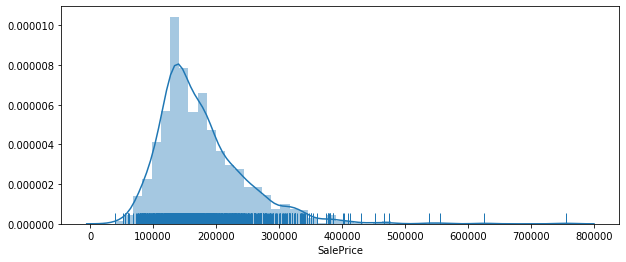

Skewness: 1.852
Kurtosis: 7.382


In [193]:
plt.figure(figsize=(10,4))
ax = sns.distplot(df['SalePrice'], kde=True, rug=True)
plt.show()
print("Skewness:", df['SalePrice'].skew().round(3))
print("Kurtosis:", df['SalePrice'].kurt().round(3))

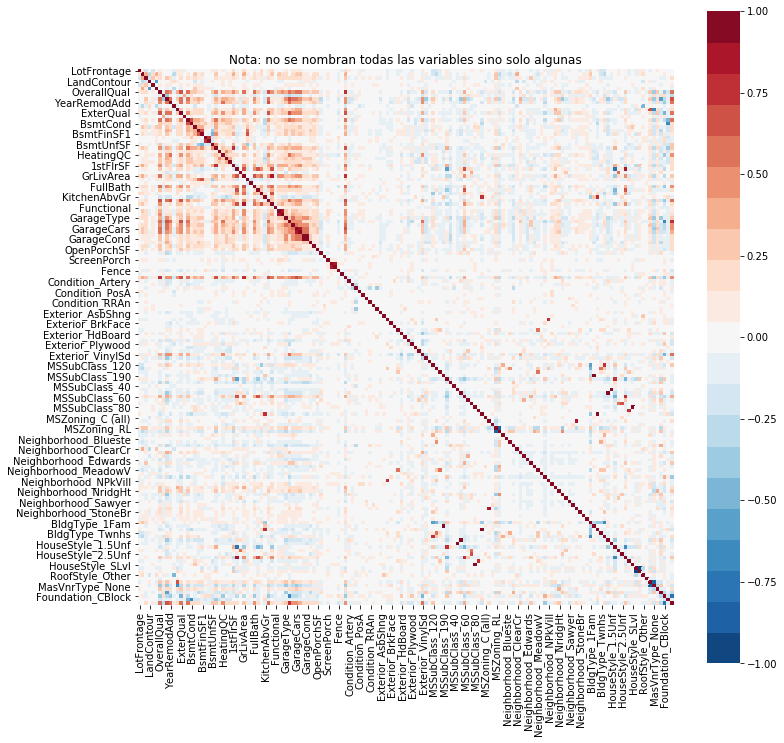

In [194]:
#corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmin=-1, vmax=1, square=True, cmap=sns.color_palette("RdBu_r", 21))
plt.title("Nota: no se nombran todas las variables sino solo algunas");

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:1176: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


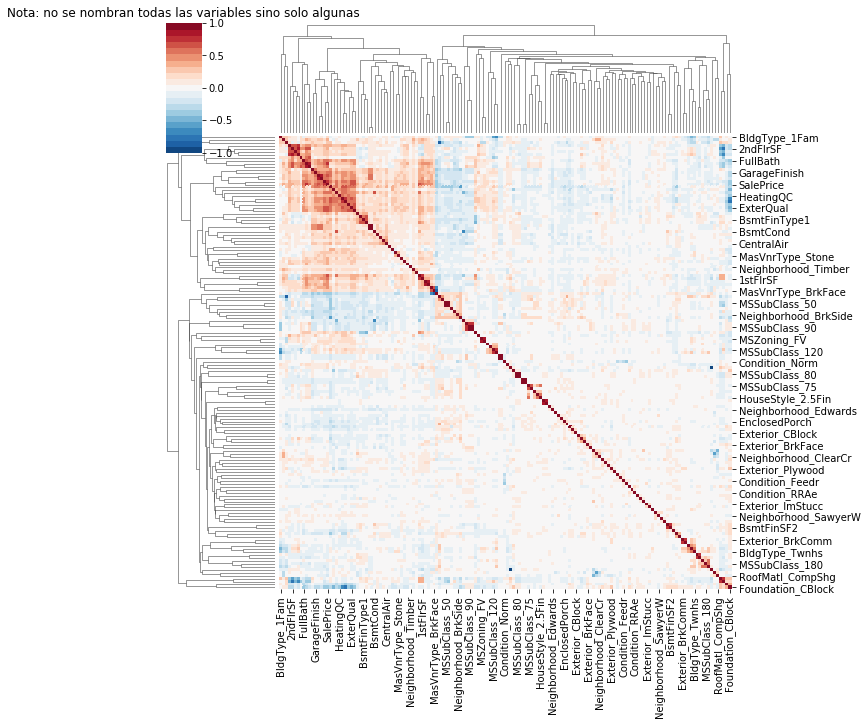

In [195]:
sns.clustermap(corr, vmin=-1, vmax=1, square=True, cmap=sns.color_palette("RdBu_r", 21))
plt.title("Nota: no se nombran todas las variables sino solo algunas");

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5, kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}}
            )
plt.show()

### **SalePrice vs OverallQual**

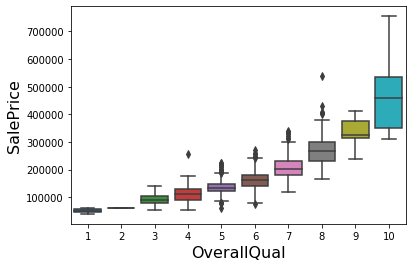

In [196]:
data = pd.concat([df['OverallQual'], df['SalePrice']], axis=1)
plt.figure(figsize=(6, 4))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.set_xlabel('OverallQual', fontsize=16)
fig.set_ylabel('SalePrice', fontsize=16)
plt.show()

### **SalePrice vs YearBuilt**

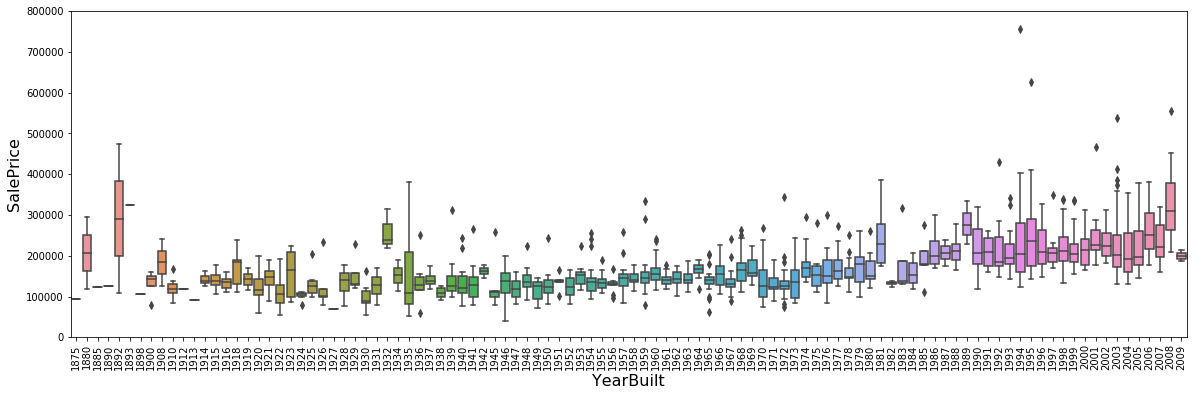

In [197]:
plt.figure(figsize=(20, 6))
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = df)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
fig.set_xlabel('YearBuilt', fontsize=16)
fig.set_ylabel('SalePrice', fontsize=16)
plt.show()

### **Lista de atributos categóricos**

In [198]:
print(df.select_dtypes(include=['object']).columns.values)

[]


### **Lista de atributos numéricos**

In [199]:
print(df.select_dtypes(exclude=['object']).columns.values)

['LotFrontage' 'LotArea' 'LotShape' 'LandContour' 'LotConfig' 'LandSlope'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofMatl_CompShg'
 'MasVnrArea' 'ExterQual' 'ExterCond' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating_GasA' 'HeatingQC' 'CentralAir' 'Electrical'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu'
 'GarageType' 'GarageYrBlt_gt_1990' 'GarageFinish' 'GarageCars'
 'GarageArea' 'GarageQual' 'GarageCond' 'PavedDrive' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'PoolQC' 'Fence' 'MiscVal' 'SalePrice' 'Condition_Artery'
 'Condition_Feedr' 'Condition_Norm' 'Condition_PosA' 'Condition_PosN'
 'Condition_RRAe' 'Condition_RRAn' 'Condition_RRNe' 'Condition_RRNn'
 'Exterior_AsbShng' 'Exterior_AsphShn' '

# **Estandarización**

PCA necesita que las variables midan lo mismo (por ejemplo píxels de una imagen), o que tengan una escala similar. Las variables que se salen de escala necesitan estandarizarse.

No estandarizaré las variables que sean binarias. El motivo es que no se salen de escala, y por otra parte si estandarizara todas las binarias que vienen de dummies le daría un peso mucho mayor a la variable original de las que provienen los dummies. Por ejemplo, la variable "Neighbourhood" da lugar a 25 dummies. Si se estandarizasen cada uno de ellos, cada uno tendría el mismo peso que cualquier otra variable que no provenga de dummies (por ejemplo "OverallQual"), por lo que esta última variable tendría 25 veces menos peso que "Neighbourhood".

In [0]:
# primero busco variables las columnas binarias:
def es_binaria(x):
    aux = np.unique(x)
    if len(aux)!=2:
        return False
    return (aux[0]==0) and (aux[1]==1) # np.unique devuelve los valores únicos ordenados

binarias    = []
no_binarias = []
atributos   = df.columns.tolist()
atributos.remove("SalePrice") # SalePrice no se mete en el análisis PCA
for col in atributos:
    if es_binaria(df[col]):
        binarias.append(col)
    else:
        no_binarias.append(col)

In [201]:
print(binarias)

['RoofMatl_CompShg', 'Heating_GasA', 'CentralAir', 'BsmtHalfBath', 'GarageYrBlt_gt_1990', 'Condition_Artery', 'Condition_Feedr', 'Condition_Norm', 'Condition_PosA', 'Condition_PosN', 'Condition_RRAe', 'Condition_RRAn', 'Condition_RRNe', 'Condition_RRNn', 'Exterior_AsbShng', 'Exterior_AsphShn', 'Exterior_BrkComm', 'Exterior_BrkFace', 'Exterior_CBlock', 'Exterior_CemntBd', 'Exterior_HdBoard', 'Exterior_ImStucc', 'Exterior_MetalSd', 'Exterior_Plywood', 'Exterior_Stone', 'Exterior_Stucco', 'Exterior_VinylSd', 'Exterior_Wd Sdng', 'Exterior_WdShing', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_C

In [202]:
print(no_binarias)

['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal']


In [0]:
# Ahora estandarizo solo las no binarias:

from sklearn.preprocessing import StandardScaler

# Nota: en este ejercicio no construiremos un sistema de predicción después de hacer PCA
# En el caso en que lo hiciéramos, tendríamos que construir el estandarizador y PCA
# usando solo el conjunto de training. Para ello habría que separar antes en training
# y test, y las siguientes líneas aplicarlas sólo al conjunto de training
sc = StandardScaler()
sc.fit(df[no_binarias].values)
valores_no_binarias_sc = sc.transform(df[no_binarias].values)

In [204]:
# junto los valores de las binarias estandarizadas con las binarias:

df_sc = df.copy()
df_sc[no_binarias] = valores_no_binarias_sc
df_sc.head(3)

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl_CompShg,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_GasA,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt_gt_1990,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Other,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,0.269799,-0.300436,-0.728326,0.285933,-0.549693,-0.228443,0.742640,-0.570526,1.159070,0.960090,1,0.585403,1.196831,-0.266229,0.64889,0.135516,-0.576662,1.132371,0.619236,-0.29786,-0.305252,-0.895237,-0.445093,1,0.927206,1,0.275654,-0.808765,1.182592,-0.113376,0.437714,1.106394,0,0.858884,1.219653,0.168295,-0.197965,0.856356,0.981795,0.245554,-0.973009,-1.030573,0.736014,1,0.326796,0.377733,0.428562,0.235325,0.23908,0.264541,-0.770200,0.297113,-0.348462,-0.115837,-0.277884,-0.051704,-0.045174,-0.486748,-0.092639,208500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.701332,-0.099049,-0.728326,0.285933,3.160736,-0.228443,-0.013552,2.108465,0.183999,-0.388099,1,-0.576099,-0.655684,-0.266229,0.64889,0.135516,2.250078,0.646136,1.285470,-0.29786,-0.305252,-0.579016,0.571086,1,0.927206,1,0.275654,0.331738,-0.787080,-0.113376,-0.455599,-0.866027,1,0.858884,-0.773220,0.168295,-0.197965,-0.733816,-0.284891,0.245554,0.573826,0.661609,0.736014,0,0.326796,0.377733,-0.016077,0.235325,0.23908,0.264541,1.543281,-0.699500,-0.348462,-0.115837,-0.277884,-0.051704,-0.045174,-0.486748,-0.092639,181500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0.356105,0.189899,1.019656,0.285933,-0.549693,-0.228443,0.742640,-0.570526,1.086842,0.910157,1,0.383918,1.196831,-0.266229,0.64889,0.135516,0.365585,1.132371,0.080371,-0.29786,-0.305252,-0.225037,-0.284907,1,0.927206,1,0.275654,-0.628981,1.210269,-0.113376,0.589258,1.106394,0,0.858884,1.219653,0.168295,-0.197

In [0]:
df_sc.reset_index(inplace=True, drop=True)

In [0]:
df_sc.to_csv("datos_limpios_y_estandarizados_practica2.csv",index=False)